In [1]:
#load the magic
import matplotlib.pyplot as plt 
%matplotlib inline

import sys
import datacube.utils.rio
import datacube

sys.path.append("../Scripts")
from deafrica_datahandling import load_ard
from deafrica_plotting import rgb
from deafrica_plotting import display_map
from odc.algo import xr_geomedian

#This will speed up loading data
datacube.utils.rio.set_default_rio_config(aws='auto', cloud_defaults=True)

In [2]:
#introduce yourself
dc = datacube.Datacube(app="Calculate_ndvi")

In [3]:
#where?
x= (-6.1495, -6.1380)
y= (13.9182, 13.9111)

display_map(x, y)

In [4]:
#parameters

sentinel_2_ds = load_ard(
    dc=dc,
    products=["s2_l2a"],
    x=x, y=y,
    time=("2019-01", "2019-12"),
    output_crs="EPSG:6933",
    measurements=['red', 'green', 'blue'],
    resolution=(-10, 10),
    group_by='solar_day')

Using pixel quality parameters for Sentinel 2
Finding datasets
    s2_l2a
Applying pixel quality/cloud mask
Loading 71 time steps


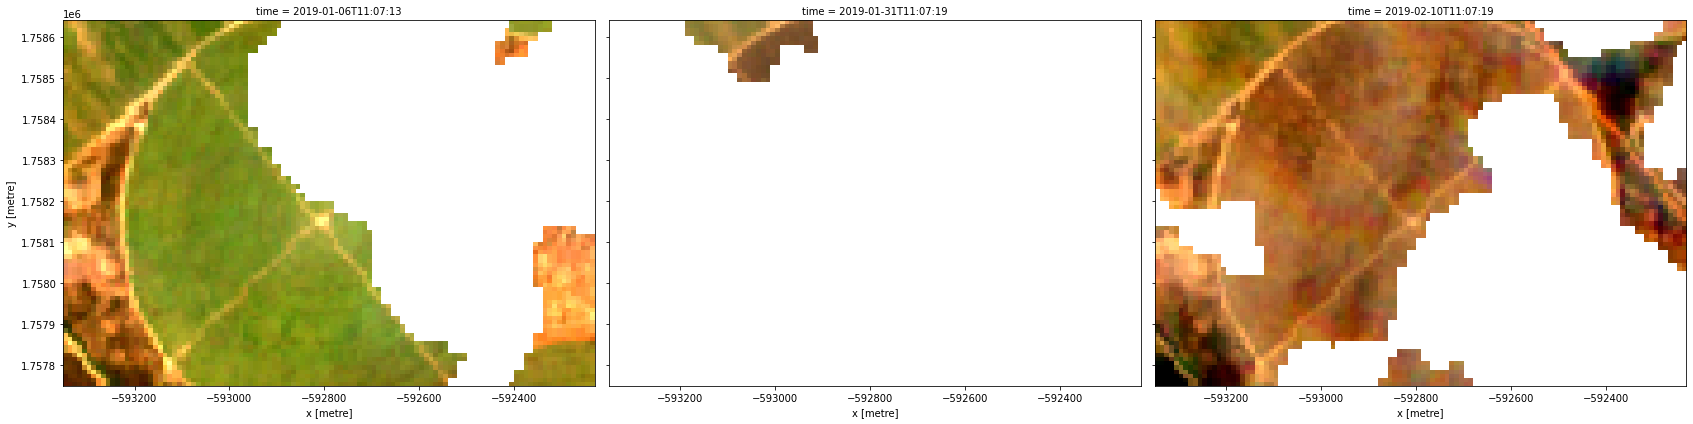

In [5]:
#which index
timesteps = [1, 6, 8]

#plot
rgb(sentinel_2_ds, bands=['red', 'green', 'blue'], index=timesteps)

In [6]:
#resample 3 months @ the start of the month = 4 images per year
resample_sentinel_2_ds = sentinel_2_ds.resample(time='3MS')

In [7]:
#calculate geomedian for every resampled image
geomedian_resample = resample_sentinel_2_ds.map(xr_geomedian)

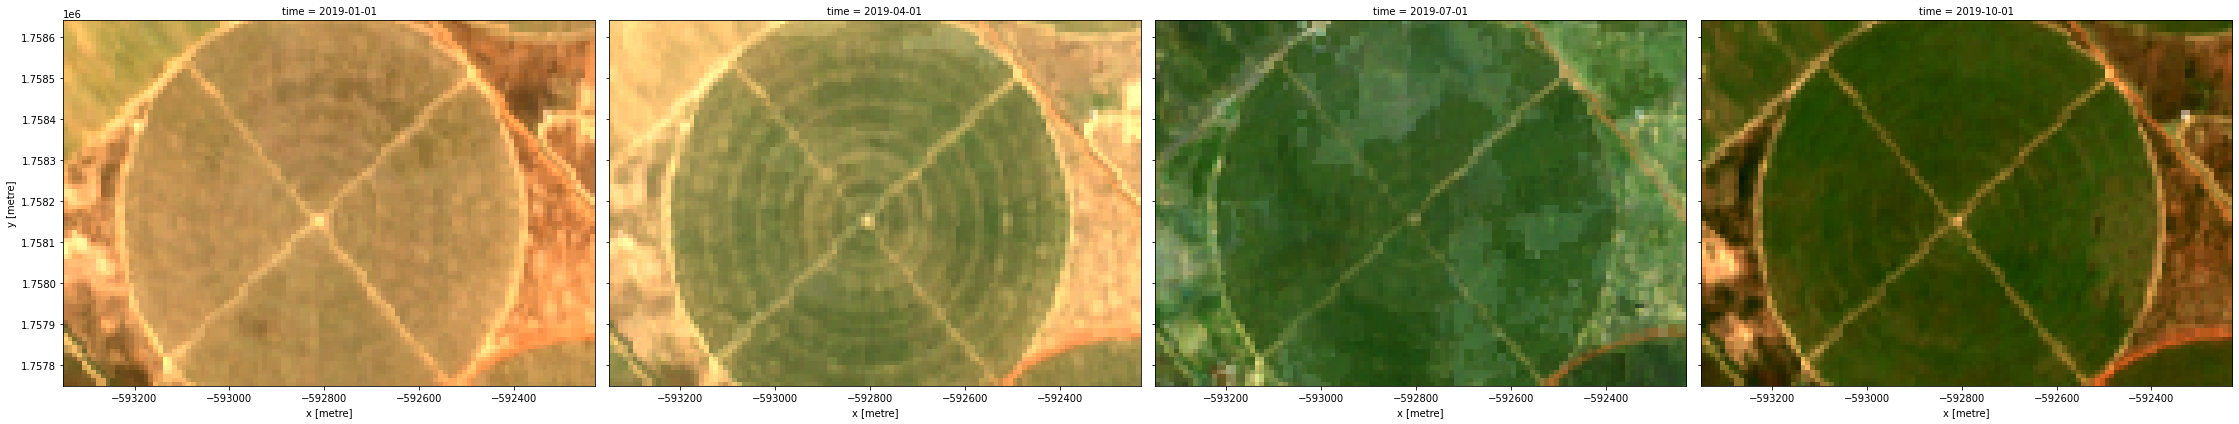

In [8]:
#plot
rgb(geomedian_resample, bands=['red', 'green', 'blue'], col="time", col_wrap=4)

In [9]:
#original dataset
sentinel_2_ds

<xarray.Dataset>
Dimensions:      (time: 71, x: 112, y: 89)
Coordinates:
  * y            (y) float64 1.759e+06 1.759e+06 ... 1.758e+06 1.758e+06
    spatial_ref  int32 6933
  * time         (time) datetime64[ns] 2019-01-01T11:07:16 ... 2019-12-27T11:...
  * x            (x) float64 -5.933e+05 -5.933e+05 ... -5.922e+05 -5.922e+05
Data variables:
    red          (time, y, x) float32 1192.0 1272.0 1290.0 ... 927.0 939.0 938.0
    green        (time, y, x) float32 1036.0 1092.0 1104.0 ... 935.0 985.0 971.0
    blue         (time, y, x) float32 766.0 808.0 785.0 ... 545.0 550.0 530.0
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

In [10]:
#resampled geomedian
geomedian_resample

<xarray.Dataset>
Dimensions:  (time: 4, x: 112, y: 89)
Coordinates:
  * time     (time) datetime64[ns] 2019-01-01 2019-04-01 2019-07-01 2019-10-01
  * y        (y) float64 1.759e+06 1.759e+06 1.759e+06 ... 1.758e+06 1.758e+06
  * x        (x) float64 -5.933e+05 -5.933e+05 ... -5.922e+05 -5.922e+05
Data variables:
    red      (time, y, x) float32 1636.4856 1729.0841 ... 651.4745 670.9271
    green    (time, y, x) float32 1328.8126 1375.9498 ... 711.07214 716.0723
    blue     (time, y, x) float32 837.9998 877.3378 ... 350.0644 358.5672

In [11]:
#parameters for ndvi
sentinel_2_ds = load_ard(
    dc=dc,
    products=["s2_l2a"],
    x=x, y=y,
    time=("2019-01", "2019-12"),
    output_crs="EPSG:6933",
    measurements=['red', 'green', 'blue', 'nir'],
    resolution=(-10, 10),
    group_by='solar_day')

Using pixel quality parameters for Sentinel 2
Finding datasets
    s2_l2a
Applying pixel quality/cloud mask
Loading 71 time steps


In [12]:
#resample 3 months @ the start of the month = 4 images per year
resample_sentinel_2_ds = sentinel_2_ds.resample(time='3MS')

#calculate geomedian for every resampled image
geomedian_resample = resample_sentinel_2_ds.map(xr_geomedian)

#original dataset
sentinel_2_ds

<xarray.Dataset>
Dimensions:      (time: 71, x: 112, y: 89)
Coordinates:
  * y            (y) float64 1.759e+06 1.759e+06 ... 1.758e+06 1.758e+06
    spatial_ref  int32 6933
  * time         (time) datetime64[ns] 2019-01-01T11:07:16 ... 2019-12-27T11:...
  * x            (x) float64 -5.933e+05 -5.933e+05 ... -5.922e+05 -5.922e+05
Data variables:
    red          (time, y, x) float32 1192.0 1272.0 1290.0 ... 927.0 939.0 938.0
    green        (time, y, x) float32 1036.0 1092.0 1104.0 ... 935.0 985.0 971.0
    blue         (time, y, x) float32 766.0 808.0 785.0 ... 545.0 550.0 530.0
    nir          (time, y, x) float32 2740.0 2812.0 2866.0 ... 3306.0 3242.0
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

In [13]:
#resampled geomedian
geomedian_resample

<xarray.Dataset>
Dimensions:  (time: 4, x: 112, y: 89)
Coordinates:
  * time     (time) datetime64[ns] 2019-01-01 2019-04-01 2019-07-01 2019-10-01
  * y        (y) float64 1.759e+06 1.759e+06 1.759e+06 ... 1.758e+06 1.758e+06
  * x        (x) float64 -5.933e+05 -5.933e+05 ... -5.922e+05 -5.922e+05
Data variables:
    red      (time, y, x) float32 1654.7893 1770.8843 ... 665.5554 694.822
    green    (time, y, x) float32 1348.7592 1409.6754 ... 723.7687 739.2761
    blue     (time, y, x) float32 837.38544 882.7103 ... 359.04172 380.6102
    nir      (time, y, x) float32 3740.0647 3712.3347 ... 3000.3389 2931.3264

In [15]:
#calculate ndvi
nir = geomedian_resample.nir
red = geomedian_resample.red

NDVI = (nir - red) / (nir + red)

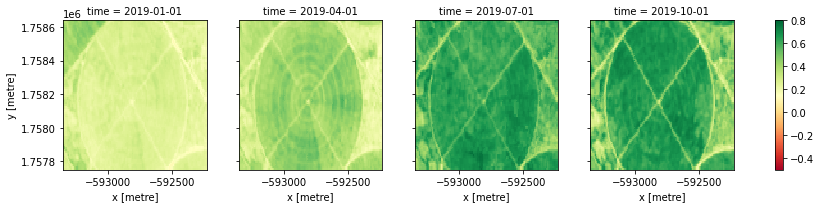

In [16]:
#plot
NDVI.plot(col='time', vmin=-0.50, vmax=0.8, cmap='RdYlGn')

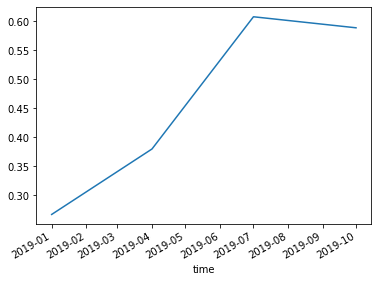

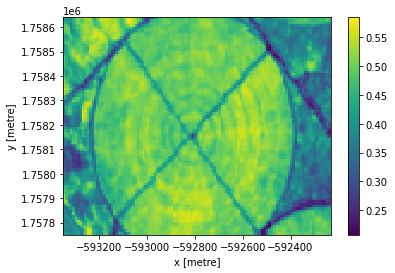

In [44]:
NDVI.mean(dim=['x', 'y']).plot(size=4)
NDVI.mean(dim=['time']).plot(size=4)

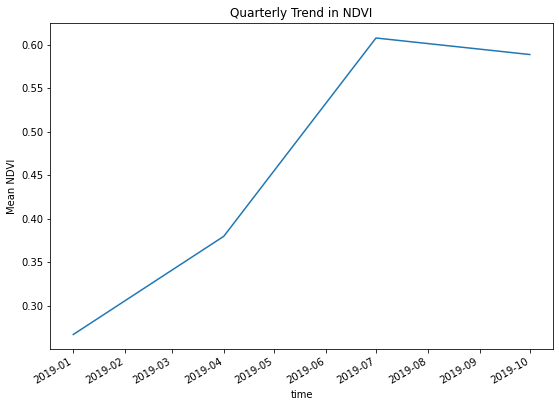

In [47]:
NDVI.mean(dim=['x', 'y']).plot(size=6)
plt.title('Quarterly Trend in NDVI')
plt.ylabel('Mean NDVI')
plt.show()

In [49]:
#Session_4 quiz

#where?
x = (-5.7295, -5.7485)
y = (34.3971, 34.4131)

display_map(x, y)

In [50]:
#parameters for ndvi
sentinel_2_ds = load_ard(
    dc=dc,
    products=["s2_l2a"],
    x=x, y=y,
    time=("2019-01", "2019-12"),
    output_crs="EPSG:6933",
    measurements=['red', 'green', 'blue', 'nir'],
    resolution=(-10, 10),
    group_by='solar_day')

Using pixel quality parameters for Sentinel 2
Finding datasets
    s2_l2a
Applying pixel quality/cloud mask
Loading 146 time steps


In [51]:
#resample 3 months @ the start of the month = 4 images per year
resample_sentinel_2_ds = sentinel_2_ds.resample(time='3MS')

#calculate geomedian for every resampled image
geomedian_resample = resample_sentinel_2_ds.map(xr_geomedian)

#how does it differ from the original
geomedian_resample

<xarray.Dataset>
Dimensions:  (time: 4, x: 185, y: 170)
Coordinates:
  * time     (time) datetime64[ns] 2019-01-01 2019-04-01 2019-07-01 2019-10-01
  * y        (y) float64 4.137e+06 4.137e+06 4.137e+06 ... 4.135e+06 4.135e+06
  * x        (x) float64 -5.547e+05 -5.546e+05 ... -5.528e+05 -5.528e+05
Data variables:
    red      (time, y, x) float32 591.10254 467.04227 ... 914.58124 922.5589
    green    (time, y, x) float32 632.37366 515.4199 ... 812.1034 815.1848
    blue     (time, y, x) float32 420.05368 338.40173 ... 540.1491 538.6843
    nir      (time, y, x) float32 2195.1304 2023.607 ... 2226.3933 2245.242

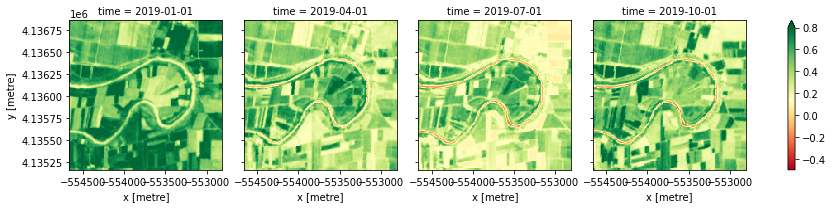

In [52]:
#calculate ndvi
nir = geomedian_resample.nir
red = geomedian_resample.red

NDVI = (nir - red) / (nir + red)

#plot
NDVI.plot(col='time', vmin=-0.50, vmax=0.8, cmap='RdYlGn')